In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
import juplot as jp

sns.set_theme()

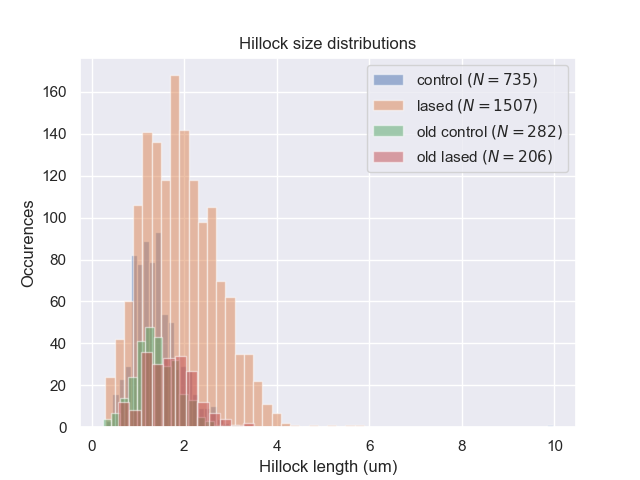

In [3]:
f_control = "measurements_newchip_control.csv"
f_lased = "measurements_newchip_heavy_lased.csv"

f_lased_mid = "measurements_mid.csv"

f_control_old = "measurements_control.csv"
f_lased_old = "measurements_lased.csv"

pixels_per_um = 188 / 20

control = pd.read_csv(f_control, skiprows=1).squeeze()
lased = pd.read_csv(f_lased, skiprows=1).squeeze()

lased_mid = pd.read_csv(f_lased_mid, skiprows=1).squeeze()

control_old = pd.read_csv(f_control_old, skiprows=1).squeeze() / pixels_per_um
lased_old = pd.read_csv(f_lased_old, skiprows=1).squeeze() / pixels_per_um

data = pd.concat([control, lased], axis=1, ignore_index=True).rename(columns={0: "control", 1: "lased"})

fig, ax = jp.juplot(1)
ax.hist(control, bins="auto", alpha=0.5, label=f"control $(N={len(control)})$")
ax.hist(lased, bins="auto", alpha=0.5, label=f"lased $(N={len(lased)})$")

ax.hist(control_old, bins="auto", alpha=0.5, label=f"old control $(N={len(control_old)})$")
ax.hist(lased_old, bins="auto", alpha=0.5, label=f"old lased $(N={len(lased_old)})$")

ax.set_title("Hillock size distributions")
ax.set_xlabel("Hillock length (um)")
ax.set_ylabel("Occurences")
ax.legend()

plt.show()

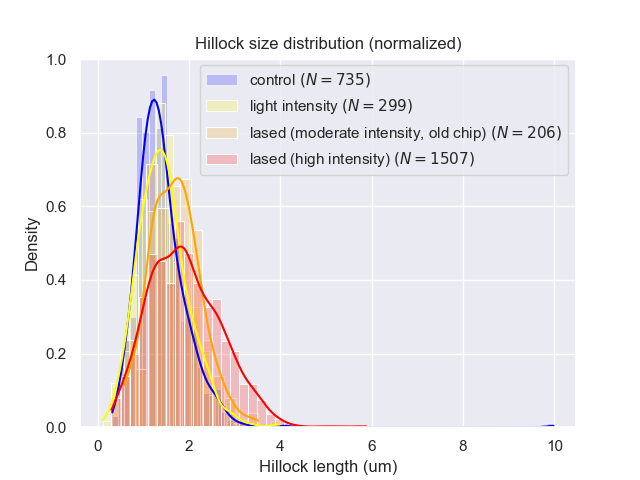

In [4]:
fig2, ax2 = jp.juplot(2)
bar_alpha = 0.2

sns.histplot(control, bins="auto", label=f"control $(N={len(control)})$", ax=ax2, kde=True, color="blue", stat="density", legend=True, alpha=bar_alpha)
sns.histplot(lased_mid, bins="auto", label=f"light intensity $(N={len(lased_mid)})$", ax=ax2, kde=True, color="yellow", stat="density", legend=True, alpha=bar_alpha)
sns.histplot(lased_old, bins="auto", label=f"lased (moderate intensity, old chip) $(N={len(lased_old)})$", color="orange", stat="density", kde=True, ax=ax2, alpha=bar_alpha)
sns.histplot(lased, bins="auto", label=f"lased (high intensity) $(N={len(lased)})$", ax=ax2, kde=True, color="red", stat="density", legend=True, alpha=bar_alpha)

# sns.histplot(control_old, bins="auto", label=f"old chip control $(N={len(control_old)})$", ax=ax2, kde=True, color="indigo", stat="density", legend=True, alpha=0.3)

ax2.set_title("Hillock size distribution (normalized)")

ax2.set_xlabel("Hillock length (um)")
ax2.set_ylabel("Density")
ax2.legend()

plt.show()

<Axes: xlabel='Treatment', ylabel='Hillock Density (count / um^2)'>

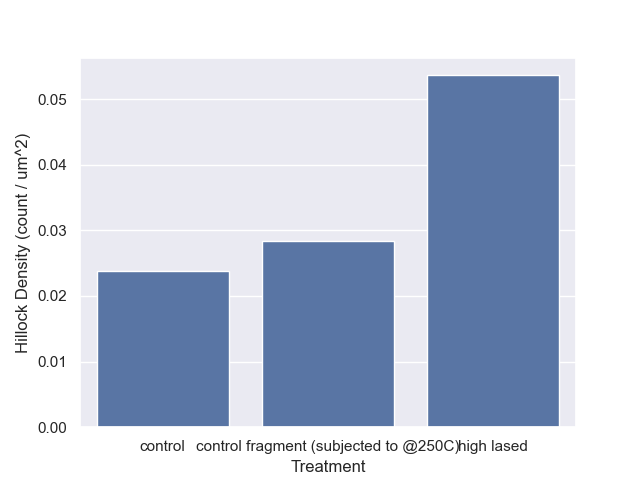

In [13]:
A_highlased = 28094 # um^2
A_control = 30948
A_oldcontrol = 14637

count_oldcontrol = 415

highlase_density = [len(lased) / A_highlased, "high lased"]
control_density = [len(control) / A_control, "control"]
oldcontrol_density = [count_oldcontrol / A_oldcontrol, "control fragment (subjected to @250C)"]

density_df = pd.DataFrame([control_density, oldcontrol_density, highlase_density], columns=("Hillock Density (count / um^2)", "Treatment"))

fig3, ax3 = jp.juplot(3)

sns.barplot(data=density_df, x="Treatment", y="Hillock Density (count / um^2)", ax=ax3)